In [1]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


         ID Diagnosis  Mean Radius  Mean Texture  Mean Perimeter  Mean Area  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   Mean Smoothness  Mean Compactness  Mean Concavity  Mean Concave Points  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  Worst Radius  Worst Texture  Worst Perimeter  Worst Ar

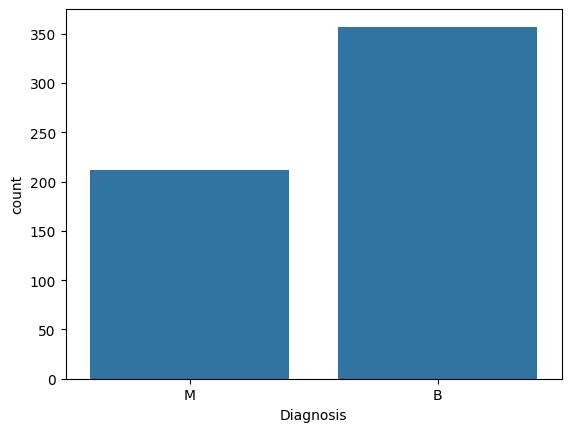

Accuracy: 0.956140350877193
Confusion Matrix:
 [[70  1]
 [ 4 39]]
Classification Report:
               precision    recall  f1-score   support

           B       0.95      0.99      0.97        71
           M       0.97      0.91      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



C:\Users\kunal\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [5]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Step 2: Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"
column_names = ['ID', 'Diagnosis', 'Mean Radius', 'Mean Texture', 'Mean Perimeter', 'Mean Area', 
                'Mean Smoothness', 'Mean Compactness', 'Mean Concavity', 'Mean Concave Points', 
                'Mean Symmetry', 'Mean Fractal Dimension', 'SE Radius', 'SE Texture', 'SE Perimeter', 
                'SE Area', 'SE Smoothness', 'SE Compactness', 'SE Concavity', 'SE Concave Points', 
                'SE Symmetry', 'SE Fractal Dimension', 'Worst Radius', 'Worst Texture', 'Worst Perimeter', 
                'Worst Area', 'Worst Smoothness', 'Worst Compactness', 'Worst Concavity', 'Worst Concave Points', 
                'Worst Symmetry', 'Worst Fractal Dimension']
data = pd.read_csv(url, names=column_names)

# Step 3: Data Exploration
print(data.head())  # Display the first few rows of the dataset
print(data.info())  # Get information about the dataset
print(data.describe())  # Get summary statistics of the numerical columns

# Step 4: Data Visualization
sns.countplot(x='Diagnosis', data=data)  # Visualize the class distribution
plt.show()

# Step 5: Prepare the data for modeling
X = data.drop(['ID', 'Diagnosis'], axis=1)  # Features
y = data['Diagnosis']  # Target variable

# Step 6: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 7: Build a Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Step 8: Model Evaluation
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)
